In [1]:
import pandas as pd
#导入逻辑回归模型
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
#引入交叉验证的包
# from sklearn.cross_validation import KFold 
# 因为0.18版本，不推荐使用：该模块将在0.20被删除。使用sklearn.model_selection.KFold来代替
from sklearn.model_selection import KFold
from sklearn import model_selection
import numpy as np

titanic  =  pd.read_csv('/Users/alan/tensorflow/titanic_train.csv')
titanic.head(10)#显示前10行数据看看

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
#检查数据的NaN值统计
titanic.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# age列数据缺失了，需要补全（填充）：缺失值用中位数来填充
titanic['Age']  =  titanic['Age'].fillna(titanic['Age'].median())

In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# titanic['Age']

In [8]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
titanic['Sex'].unique()

array(['male', 'female'], dtype=object)

In [10]:
# 数据转换：
# 查看性别数据一共有几种（不重复的）：
# print (titanic['Sex'].unique())
# 为了处理数据方便，将性别改为int ：男：1 女：0
titanic['Sex']=titanic['Sex'].replace(['male','female'],[1,0])

In [11]:
titanic['Sex'].unique()

array([1, 0])

In [12]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [53]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
titanic['Embarked']=titanic['Embarked'].fillna('S')

In [14]:
titanic['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [16]:
titanic['Embarked']=titanic['Embarked'].replace(['S','C','Q'],[0,1,2])

In [17]:
titanic['Embarked'].unique()

array([0, 1, 2])

In [20]:
# 添加特征变量：名字长度、家庭人数、
titanic['Namelength']=titanic['Name'].apply(lambda x:len(x))
titanic['Family']=titanic["SibSp"] + titanic["Parch"]
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Namelength', 'Family'],
      dtype='object')

In [22]:
predictors=['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Embarked', 'Namelength', 'Family']
titanic[predictors].head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Namelength,Family
0,3,1,22.0,1,0,7.2500,0,23,1
1,1,0,38.0,1,0,71.2833,1,51,1
2,3,0,26.0,0,0,7.9250,0,22,0
3,1,0,35.0,1,0,53.1000,0,44,1
4,3,1,35.0,0,0,8.0500,0,24,0


In [23]:
# 特征选择
from xgboost import XGBClassifier
from xgboost import plot_importance
import xgboost as xgb
import matplotlib.pyplot as plt

X=titanic[predictors]
Y=titanic['Survived']


/Users/alan/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


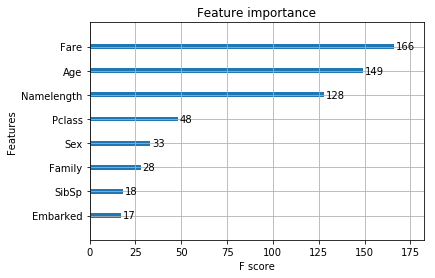

In [24]:
# 创建模型：极端梯度提升算法
#特征变量选取：船舱等级、性别、年龄、兄弟姐妹、父母孩子、船票价格、登船地点
# predictors  =  ["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]
model=XGBClassifier()
model.fit(X,Y)
plot_importance(model)
plt.show()

In [34]:
# titanic[predictors].to_csv('/Users/alan/tensorflow/titanic_process_data.csv',index=False)

In [30]:
scores=cross_val_score(model,X,Y,cv=3)

In [31]:
scores

array([ 0.82828283,  0.82828283,  0.81818182])

In [32]:
scores.mean()

0.82491582491582494

In [43]:
# 交叉检验（CV)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
predictors  =  ["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]
model=LogisticRegression()
kf=KFold(titanic.shape[0],n_folds=3,random_state=1)
kf

sklearn.cross_validation.KFold(n=891, n_folds=3, shuffle=False, random_state=1)

In [44]:
# 进行预测
predictions = []
#交叉验证
for train, test in kf:
#     print(train)
#       print(test)
    # 将训练数据分成3份，2份train,1份test
    train_predictors = (titanic[predictors].iloc[train,:])
#     print(train_predictors)
    # 交叉验证target值预测
    train_target = titanic["Survived"].iloc[train]
#     print(train_target)
    # 使用预测变量和目标来训练算法.
    model.fit(train_predictors, train_target)
    # 在测试集折叠的数据上预测是否获救
    test_predictions = model.predict(titanic[predictors].iloc[test,:])
    predictions.append(test_predictions)

In [45]:
# 把我们所做的3套预测合并为一列，这可以通过numpy的concatenate函数（以及它的变形）来实现
import numpy as np
predictions=np.concatenate(predictions,axis=0)

In [46]:
# 评估误差,准确率
predictions[predictions>0.5]=1
predictions[predictions<=0.5]=0
# predictions

In [47]:
# titanic['Survived']

In [48]:
accuracy=len(predictions[predictions == titanic['Survived']])/len(predictions)
accuracy

0.792368125701459

In [49]:
# 生成提交文件
# 逻辑回归模型初始化
model=LogisticRegression(random_state=1)
# 使用所有训练数据训练算法
model.fit(titanic[predictors],titanic['Survived'])
# 使用测试集进行预测,我这里没有测试集数据，所以还是用的训练集数据，只是方式方法说明，这个数据集就是以后你要预测的数据，他实际上是没有target标签的
predictions=model.predict(titanic[predictors])
# 创建一个新的数据框，只有Kaggle需要的数据集：主键id和是否获救标签
submission = pd.DataFrame({"PassengerId": titanic["PassengerId"],"Survived": predictions})
# 将预测数据保存到文本文件
submission.to_csv("/Users/alan/tensorflow/titanic_predict.csv", index=False)